In [82]:
import sklearn.decomposition as sk_decomp
from sklearn import linear_model as lm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import cross_val_score as cvs

In [83]:
meth_even = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_meth_even_with_background.tsv", sep="\t")
meth_odd = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_meth_odd_with_background.tsv", sep="\t")
unmeth_even = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_unmeth_even_with_background.tsv", sep="\t")
unmeth_odd = pd.read_csv("processed_data\combined_data\split_with_background\\2mers_extend200\combined_2mers_unmeth_odd_with_background.tsv", sep="\t")
#unmeth = pd.read_csv("processed_data\combined_data\split_with_background\combined_2mers_unmeth.tsv", sep="\t")

In [84]:
meth_even

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT,cancer
0,0.804319,2.03339,1.056470,1.20562,0.413552,1.12967,0.417347,0.670372,0.383070,1.008620,0.577466,0.726583,0.731388,2.51319,1.20594,1.226250,Bile_Duct_Cancer
1,0.745990,1.96173,1.116330,1.06069,0.472634,1.15924,0.486418,0.673300,0.372710,1.030070,0.597585,0.711159,0.905156,2.48168,1.16541,1.164460,Healthy
2,0.727333,2.00649,1.080400,1.20553,0.489104,1.18409,0.486453,0.718289,0.393681,1.093730,0.578820,0.730175,0.733592,2.42884,1.14504,1.078450,Pancreatic_Cancer
3,0.593001,1.42329,0.759196,0.92304,1.186750,1.34399,0.793266,0.715950,0.640135,0.867342,0.695328,0.629703,1.493270,2.07998,1.20780,0.842335,Breast_Cancer
4,0.765763,2.01639,1.099230,1.17116,0.462408,1.14968,0.473197,0.697738,0.376041,1.082050,0.571893,0.804584,0.785160,2.35608,1.12315,1.187760,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,0.710660,1.97213,1.094210,1.32320,0.491878,1.16158,0.441435,0.804165,0.426081,0.938846,0.588999,0.757741,0.813962,2.25326,1.13260,1.224020,Healthy
471,0.764478,1.84817,1.008650,1.41412,0.452953,1.28026,0.479765,0.889747,0.370415,1.046630,0.578038,0.941336,0.753203,2.02477,1.05948,1.194960,Bile_Duct_Cancer
472,0.753082,2.05710,1.217870,1.01552,0.363160,1.11822,0.420072,0.618351,0.376948,1.040640,0.607036,0.711310,0.804118,2.62928,1.25726,1.066480,Ovarian_Cancer
473,0.698446,2.02766,1.005890,1.17893,0.472755,1.27044,0.496969,0.759438,0.429403,1.100360,0.653418,0.779329,0.748928,2.21160,1.14822,1.053630,Bile_Duct_Cancer


In [85]:
meth_even = meth_even.loc[meth_even["cancer"]=="Healthy"]
meth_odd = meth_odd.loc[meth_odd["cancer"]=="Healthy"]
unmeth_even = unmeth_even.loc[unmeth_even["cancer"]=="Healthy"]
unmeth_odd = unmeth_odd.loc[unmeth_odd["cancer"]=="Healthy"]

#meth = meth.iloc[: , :-1]
#unmeth = unmeth.iloc[: , :-1]

In [86]:
nrow = 10

In [87]:
meth_even_train = meth_even.head(nrow)
meth_odd_train = meth_odd.head(nrow)
unmeth_even_train = unmeth_even.head(nrow)
unmeth_odd_train= unmeth_odd.head(nrow)

In [88]:
frames = [meth_even,meth_odd,unmeth_even,unmeth_odd]
combo = pd.concat(frames)
combo = combo.iloc[: , :-1]

In [89]:
pca = sk_decomp.PCA(n_components=16)
combo = pca.fit_transform(combo)

In [90]:
def column(matrix, i):
    return [row[i] for row in matrix]

In [91]:
y1 = [0]*nrow
y2 = [0]*nrow
y3 = [1]*nrow
y4= [1]*nrow
Y = [y1,y2,y3,y4]

In [92]:
y = []
for i in range(4):
    for j in Y[i]:
        y.append(Y[i][j])

In [93]:
trow = 244

In [94]:
y1p = [0]*(trow)
y2p = [0]*(trow)
y3p = [1]*(trow)
y4p= [1]*(trow)
Yp = [y1p,y2p,y3p,y4p]

In [95]:
yp = []
for i in range(4):
    for j in Yp[i]:
        yp.append(Yp[i][j])

In [96]:
x1 = combo[trow * 0:(trow * 0)+nrow]
x2 = combo[trow * 1:(trow * 1)+nrow]
x3 = combo[trow * 2:(trow * 2)+nrow]
x4 = combo[trow * 3:(trow * 3)+nrow]
X = [x1,x2,x3,x4]

In [97]:
x = []
for i in range(4):
    for j in range(len(X[i])):
        x.append(X[i][j])

In [98]:
clf = LR(random_state=0).fit(x,y)

In [99]:
clf.predict(combo)
#clf.predict_proba(x)
#clf.score(combo,yp)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,

In [100]:
scores = cvs(clf, combo, yp, cv=5)
scores

array([0.89795918, 0.86153846, 0.90769231, 0.88205128, 0.87692308])

TypeError: scatter() got multiple values for argument 's'

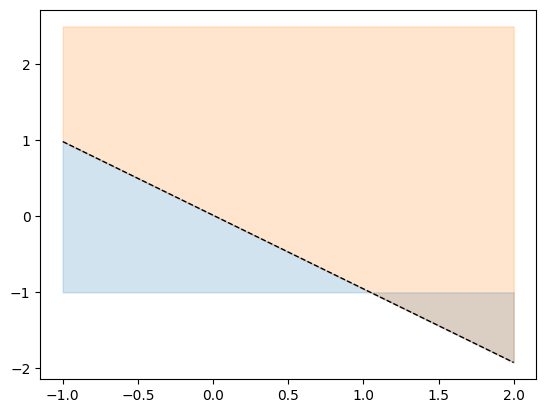

In [293]:
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
c = -b/w2
m = -w1/w2
xmin, xmax = -1, 2
ymin, ymax = -1, 2.5
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(x[trow*0:nrow*1],y[nrow*0:nrow*1], color = "blue")
plt.scatter(x[trow*1:nrow*2],y[nrow*1:nrow*2], color = "green")
plt.scatter(x[trow*2:nrow*3],y[nrow*2:nrow*3], color = "yellow")
plt.scatter(x[nrow*3:nrow*4],y[nrow*3:nrow*4], color = "red")
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

In [71]:
x = column(combo,3)
y = column(combo,0)

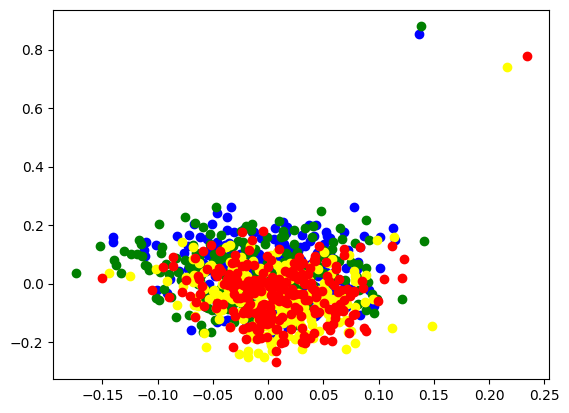

In [72]:
plt.scatter(x[nrow*0:nrow*1],y[nrow*0:nrow*1], color = "blue")
plt.scatter(x[nrow*1:nrow*2],y[nrow*1:nrow*2], color = "green")
plt.scatter(x[nrow*2:nrow*3],y[nrow*2:nrow*3], color = "yellow")
plt.scatter(x[nrow*3:nrow*4],y[nrow*3:nrow*4], color = "red")


In [85]:
x

[0.018025347763510963,
 0.01475097550458043,
 0.010819640519661444,
 0.013475247647476608,
 0.01548045288701496,
 0.020333215287604813,
 0.011701088101361804,
 0.006598114321271533,
 0.028850123969114898,
 0.012916845662471598,
 0.021912791238313797,
 0.010221756342725881,
 0.009573584714582348,
 0.015719625563334345,
 0.017516452525782683,
 0.01797319225039504,
 0.016812415630964195,
 0.012889672621996905,
 0.014876890061628088,
 0.007721007522559256,
 0.005977121496858806,
 0.016802348982567335,
 0.008540011141495187,
 0.009898805644708046,
 0.01712429943916952,
 0.013861717529010251,
 0.024022325287553884,
 0.012404226016563968,
 0.006287793145536114,
 0.013724895181982768,
 0.02018735724820568,
 0.011215330158962237,
 0.011631871649845344,
 0.014943382207734477,
 0.014027944443003254,
 0.014984735263284787,
 0.010943057935425717,
 0.010949376296424191,
 0.01640117888179639,
 0.012594781963380418,
 0.019578383625740853,
 0.024694386966176575,
 0.02403317276368412,
 0.010909994024356

In [30]:
x= np.array(x)
x= x.reshape(-1,1)
y= np.array(y)
y= y.reshape(-1,1)

In [88]:
clf = lm.Lasso()
clf.fit(x,y)
print(clf.coef_)
print(clf.intercept_)

[-0.]
[-9.66895052e-18]
